# 機械学習スクラッチ 決定木

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 評価
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# 可視化
import matplotlib.pyplot as plt
#import japanize_matplotlib
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

### 【問題1】ジニ不純度を求める関数
ノード の ジニ不純度 を計算する関数を作成してください。ノード tに対するジニ不純度 I(t)は以下の数式で求まります。クラスが混じり合っているほどジニ不純度は高くなります。

In [23]:
# 手計算
# A:クラス１：サンプル数１５、　クラス２：サンプル数１５→ジニ不純度 0.500
A = 1 - ((15/30)**2 + (15/30)**2)
print(A)

# B:クラス１：サンプル数15、クラス２：サンプル数15、クラス３：サンプル数15→ジニ不順度->0.6666666666666667
B = 1 - ((15/45)**2 + (15/45)**2 + (15/45)**2)
print(B)

# C:クラス1:サンプル数１８、クラス２：サンプル数12->ジニ不順度0480
C = 1 - ((18/30)**2 + (12/30)**2)
print(C)

# D:クラス１：サンプル数３０、クラス２：サンプル数0->ジニ不順度　0.000
D = 1 - ((30/30)**2 + (0/30)**2)
print(D)

0.5
0.6666666666666667
0.48
0.0


In [48]:
# 不順度を求める関数
def gini(c):
    # クラスラベル
    n_class = np.unique(c) # cで重複しているデータをユニークにする
    print(n_class)# abなら0,1が出力される
    # サンプル数
    n_all = len(c)
    print(n_all)
    # シグマの初期化
    sigma = 0
    # ひとつひとつのクラスラベルについて計算する
    for label in n_class:
        print(np.count_nonzero(c == label)) # c配列の中に、uniqeにした値をカウント
        sigma += (np.count_nonzero(c == label)/len(c))**2
    gini = 1 -  sigma
    return gini

In [49]:
gini(ab)

[0. 1.]
30
15
15


0.5

In [26]:
a = np.zeros(15)
b = np.ones(15)
c = np.full(15, 2)
# クラス１：サンプル数１５、クラス２：サンプル数１５→ジニ不純度0.500
ab = np.concatenate([a, b], axis = 0)
# クラス1：サンプル数15,クラス２：サンプル数１５、クラス３：サンプル数１５→ジニ不純度0.667
abc = np.concatenate([a, b, c], axis = 0)
print('（１）ab_shape:',ab.shape,'\n',ab)
print('gini(1)',gini(ab))

print('\n（２）abc_shape:',abc.shape,'\n',abc)
print('gini(2)',gini(abc))

（１）ab_shape: (30,) 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
gini(1) 0.5

（２）abc_shape: (45,) 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
gini(2) 0.6666666666666667


### 【問題2】情報利得を求める関数
次に、ノード間の 情報利得 を計算する関数を作成してください。問題1で作成したジニ不純度 
I(t)を計算する関数を呼び出して使います。情報利得IGは以下の数式で求まります。うまく分けられている時ほど情報利得は大きくなります。
ここで分岐は2つのみであるため、分岐先を「左側のノード・右側のノード」と呼びます。

In [27]:
# 手計算
gini_p = 1 - ((30/65)**2 + (35/65)**2) #  親のジニ不純度を求める
print(gini_p)

gini_left = 1-((10/40)**2 + (30/40)**2)# 左子のジニ不純度を求める
print(gini_left)

gini_right = 1 -((20/25)**2 + (5/25)**2)# 右子のジニ不純度を求める
print(gini_right)

info_profit = gini_p - (40/65)*gini_left - (25/65)*gini_right # 情報利得の公式を使用
print("情報利得", info_profit)

0.4970414201183432
0.375
0.31999999999999984
情報利得 0.14319526627218937


In [28]:
# 情報利得関数(left,rightは決めてある場合）
def info_G(N,left, right):
    #親ノートのジニ
    lp = gini(N)
    print('IP:', lp)
    # 左子ノード
    left = (len(left)/len(N))*gini(left)
    print('left:', left)
    # 右子ノード
    right = (len(right)/len(N)*gini(right))
    print('right:', right)
    # 情報利得を計算
    IG = lp - left -right
    print('情報利得:', IG)
    return IG

In [29]:
a = np.zeros(10)
b = np.ones(30)
N_left = np.concatenate([a,b], axis=0)
print('N_left_shape', N_left.shape)
c = np.zeros(20)
d = np.ones(5)
N_right = np.concatenate([c,d], axis=0)
print('N_right_shape',N_right.shape)
N_all = np.concatenate([N_left, N_right], axis=0)
print('N/all_shape', N_all.shape)

N_left_shape (40,)
N_right_shape (25,)
N/all_shape (65,)


In [30]:
info_G(N_all, N_left, N_right)

IP: 0.4970414201183432
left: 0.23076923076923078
right: 0.12307692307692303
情報利得: 0.14319526627218937


0.14319526627218937

## 【問題3】学習
空間の分割を行い、決定木のグラフを生成するコードを作成してください。今は深さ1の決定木なので、分割を1回だけ行います。ここでグラフを生成するとは、1回の分割の際の条件としてどの特徴量がいくつ以上の時とするかを求めるということです。

訓練データに対して全ての組み合わせの分割を行い、その中でノード間の情報利得が最大となる分割をそのノードの分割基準として記録します。

クラスが混ざらない不純度が0のノード、または指定された深さのノードが 葉ノード となります。葉ノードにはクラスを記録しておき、これを推定時に分類するクラスとします。クラスが混ざらない場合はそのままのクラスを記録し、混ざっている場合は多数決により決めます。

## 【問題4】推定
推定する仕組みを実装してください。ScratchDecesionTreeClassifierDepth1クラスの雛形に含まれるpredictメソッドに書き加えてください。

入力されたデータの値を学習した条件で判定していき、どの葉ノードに到達するかを見ます。葉ノードにはクラスが記録されているので、これが推定値となります。

In [31]:
class ScratchDecesionTreeClassifierDepth1():
    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        
    def gini_score(self, c):
        # ジニ不純度を計算する
        n_class = np.unique(c)
        n_all = len(c)
        sigma = 0
        for label in n_class:
            sigma += (np.count_nonzero(c == label)/len(c))**2
        gini = 1 -sigma
        return gini
    
    def information_gain(self, N, left, right):
        # 情報利得を計算する計算する
        lp = self.gini_score(N)
        left = (len(left)/len(N))*self.gini_score(left)
        right = (len(right)/len(N))*self.gini_score(right)
        IG = lp -left -right
        return IG
    
    def fit(self, X, y):
        # 決定木分類器を学習する
        # 特徴量の数
        num_features = X.shape[1]
        # forの中でのX
        split_points_list = []
        # 特徴量ごとの情報利得
        info_gain_list = []
        # 特徴量の数だけ回して,Xを全部取り出す
        for f in range(num_features):
            #重複するものは計算しない
            uniq_feature = np.unique(X[:, f])
            #情報利得
            ig_list = []
            # 取り出したX全てでIGを計算していく
            for val in uniq_feature:
                # x以上ならleft,以下ならright
                n_l, n_r = [y[X[:, f] >= val], y[X[:, f] < val]]
                ig = self.information_gain(y, n_l, n_r)
                ig_list.append(ig)
                
            #Xを特徴量ごとにリスト化
            split_points_list.append(uniq_feature.tolist())
            # 情報利得を特徴量ごとに保存
            info_gain_list.append(ig_list)
            
        # 特徴量ごとに情報利得が最大なものを取り出す
        for f in range(num_features):
            x_atmax = split_points_list[f][np.where(info_gain_list[f] == np.max(info_gain_list[f]))[0].tolist()[0]]
            y_atmax = np.max(info_gain_list[f])
            max_info_gain = np.max(np.max(info_gain_list))
            
            # 全特徴量の中から、情報利得が最大のものを記録
            if y_atmax == max_info_gain:
                # 情報利得が最大の列（特徴量）
                self.feature = f
                # その特徴量の値
                self.threshold = x_atmax
                
        # 閾値を超えた特徴量は左
        idx_left = X[:, self.feature] >= self.threshold
        idx_right = X[:, self.feature] < self.threshold
        # 閾値を超えたyは左
        left = y[idx_left]
        right = y[idx_right]
        
        # 多数決
        count_left = np.bincount(left)
        self.left = np.argmax(count_left)
        print('左子ノードのラベル:', self.left)
        count_right = np.bincount(right)
        self.right = np.argmax(count_right)
        print('右子ノードのラベル:', self.right)
        
    def predict(self, X):
        # 学習で得た閾値で推定する
        return np.where(X[:, self.feature] > self.threshold, self.left, self.right)
            

### 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したシンプルデータセット2の2値分類に対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [32]:
# シンプルデータセット２
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
#シンプルデータセットの用意
# trainとtestに分ける
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)
print('X_train_shape:',X_train.shape)
print('y_train_shape:',y_train.shape)
print('X_test_shape:',X_test.shape)
print('y_test_shape:',y_test.shape)

#ノードのラベルづけ
count_left = np.bincount(y_train)
print(count_left)
left = np.argmax(count_left)
print('左子ノードのラベル：',left)
np.unique(y_train, return_counts=True)

X_train_shape: (28, 2)
y_train_shape: (28,)
X_test_shape: (12, 2)
y_test_shape: (12,)
[15 13]
左子ノードのラベル： 0


(array([0, 1]), array([15, 13]))

## スクラッチした決定木で学習、推定

In [34]:
# 初期化、学習、推定
tree = ScratchDecesionTreeClassifierDepth1()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(y_pred)
print(y_test)

左子ノードのラベル: 1
右子ノードのラベル: 0
[1 0 0 0 0 0 0 0 1 1 0 0]
[1 1 1 0 0 0 1 0 0 1 1 1]


In [35]:
# Accuracy, Precision, Recall
from sklearn.metrics import accuracy_score
print('accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy: 0.5
             precision    recall  f1-score   support

          0       0.44      0.80      0.57         5
          1       0.67      0.29      0.40         7

avg / total       0.57      0.50      0.47        12



In [36]:
sdt = ScratchDecesionTreeClassifierDepth1()

In [37]:
sdt.fit(X_train, y_train)
y_pred = sdt.predict(X_test)

左子ノードのラベル: 1
右子ノードのラベル: 0


In [38]:
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1:",f1_score(y_test, y_pred) )
print("matrix\n", confusion_matrix(y_test, y_pred))

accuracy: 0.5
precision: 0.6666666666666666
recall: 0.2857142857142857
f1: 0.4
matrix
 [[4 1]
 [5 2]]


## sklearnのDecisionTreeClassifierで学習、推定

In [39]:
from sklearn.tree import DecisionTreeClassifier
# 初期化、学習、推定
model = DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=0)
model.fit(X_train, y_train)
y_pred_sk = model.predict(X_test)

In [40]:
print("accuracy:", accuracy_score(y_test, y_pred_sk))
print("precision:", precision_score(y_test, y_pred_sk))
print("recall:", recall_score(y_test, y_pred_sk))
print("f1:",f1_score(y_test, y_pred_sk))
print("matrix\n", confusion_matrix(y_test, y_pred_sk))

# Accuracy, Precision, Recall
print('accuracy:', accuracy_score(y_test, y_pred_sk))
print(classification_report(y_test, y_pred_sk))


accuracy: 0.5
precision: 0.6666666666666666
recall: 0.2857142857142857
f1: 0.4
matrix
 [[4 1]
 [5 2]]
accuracy: 0.5
             precision    recall  f1-score   support

          0       0.44      0.80      0.57         5
          1       0.67      0.29      0.40         7

avg / total       0.57      0.50      0.47        12



## 【問題6】決定領域の可視化
決定領域を可視化してください。

In [41]:
def decision_region(X, y, model, step=0.01, title="decision region",
                    xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    # 2値分類を２次元特徴量で学習したモデルの決定領域を描く。
    # 背景の色が、学習したモデルによる推定値から描画される。
    # 散布図の点は学習データである。
    
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), 
                                    np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y_train)):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=80, color=scatter_color[i],
                    label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    

## スクラッチ決定木の可視化

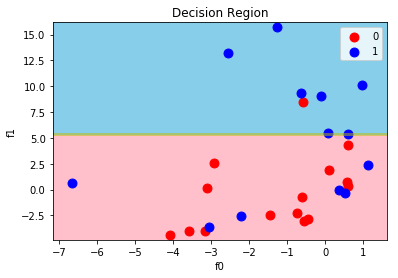

In [42]:
decision_region(X=X_test, y=y_test, model=tree, step=0.01, title='Decision Region', xlabel='f0', ylabel='f1', target_names=['0', '1'])

## skleanの決定木

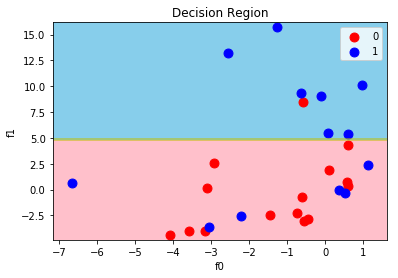

In [43]:
decision_region(X=X_test, y=y_test, model=model, step=0.01, title='Decision Region', xlabel='f0', ylabel='f1', target_names=['0', '1'])